El objetivo del ejercicio actual es utilizar medidas físicas para predecir la edad
del abulón, usando el algoritmo K-NN

In [1]:
#importaciones
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing

In [2]:
#inicial
import pandas as pd
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)
abalone.columns = [
"Sex",
"Length",
"Diameter",
"Height",
"Whole weight",
"Shucked weight",
"Viscera weight",
"Shell weight",
"Rings",
]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.drop('Sex', axis=1, inplace=True)
abalone.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


<Axes: xlabel='Rings', ylabel='Count'>

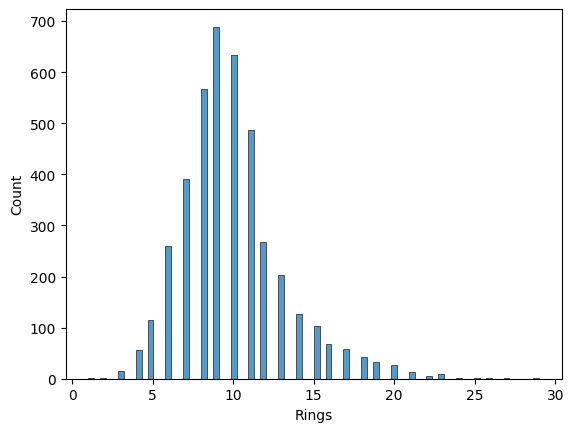

In [4]:
sns.histplot(data=abalone, x='Rings')

Tomando en cuenta el histograma podemos indicar que la mayoria de la muestra esta entre 8 y 11 anillos, segun los datos de la tabla descriptiva, rapido crecimiento y posible reproduccion? ya una vez fuera de estos limites baja bastante la cantidad de ejemplares

<Axes: xlabel='logRings', ylabel='Count'>

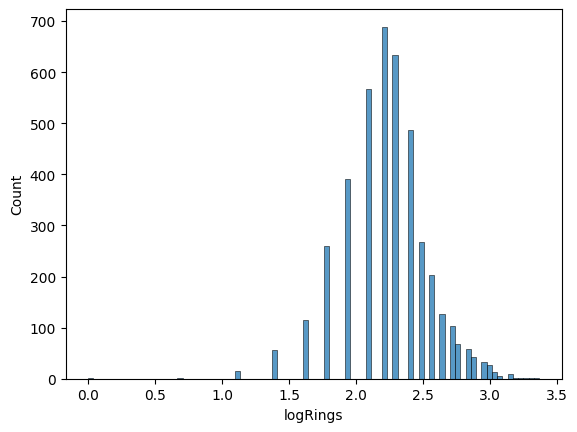

In [5]:
#Segun recomendacion de un compañero podria ser interesante normalizar los valores de Shell
abalone['logRings'] = np.log(abalone['Rings'])
sns.histplot(data=abalone, x='logRings')

<Axes: >

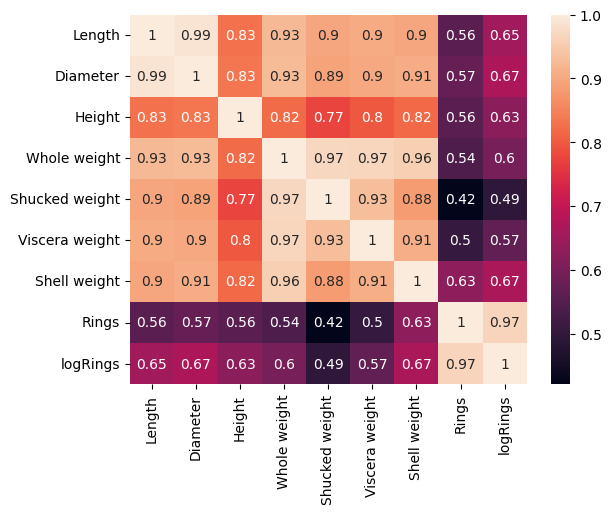

In [6]:
corr = abalone.corr()
sns.heatmap(corr, annot=True)

Segun el heatmap podemos ver que existe una gran correlacion entre las variables Diameter y Whole weight, los otros pesos los descartamos ya que existe una gran colinealidad entre ellos.

Hagamos un par de pruebas, usando los valores de y de Rings y ya, y usando los valores con el logaritmo aplicado para ver cual rinde mejor

In [7]:
#Rings solamente
X = abalone[['Diameter', 'Length', 'Whole weight']].values
y = abalone['Rings']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3311)
#probemos con una k de 4
k = 8

k8 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

y_hat = k8.predict(X_test)
y_hat[0:5]

array([ 8, 11, 12,  7, 10], dtype=int64)

In [8]:
#evaluamos la exactitud
print('Exactitud con modelo entrenamiento', metrics.accuracy_score(y_train, k8.predict(X_train)))
print('Exactitud con modelo Prueba', metrics.accuracy_score(y_test, k8.predict(X_test)))

Exactitud con modelo entrenamiento 0.39149955103262496
Exactitud con modelo Prueba 0.20334928229665072


Finalmente decidi usar la libreria para tratar de predecir la cantidad de rings dependiendo del diameter , length y whole weight. Sin embargo dado el modelo tiene baja exactitud
probe con varios valores de k los que dieron el mayor resultado fue el 8
